<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>AAIA'17 Data Mining Challenge: Helping AI to Play Hearthstone (семестровый проект)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная онлайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите [youtube](https://www.youtube.com/user/PlayHearthstone) или поиграйте сами.

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в hearthstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**.

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел [submissions](https://knowledgepit.fedcsis.org/mod/challenge/view.php?id=1024)). Без результата в [leaderboard](https://knowledgepit.fedcsis.org/mod/challenge/LeaderBoard.php?challenge=70) оценка выставлена не будет

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

In [2]:
# Загрузка данных целиком
df_list = []
for chunk in xrange(1, 5):
    filepath = './trainingData_tabular_chunk%d.csv' % chunk
    df_list.append(pd.read_csv(filepath, sep=','))

df_data = pd.concat(df_list)

In [3]:
df_data.shape

(2000000, 45)

In [4]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [5]:
df_data.head().T

gamestate_id,4687346.0,3270826.0,3189487.0,4098946.0,2661127.0
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [6]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.5047995

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm, tqdm_notebook

In [8]:
enc = OneHotEncoder(sparse=False)
X_hero_card_id = enc.fit_transform(df_data[['opponent_hero_card_id', 'player_hero_card_id']])
X = np.asarray(df_data.drop(['decision', 'opponent_hero_card_id', 'player_hero_card_id'], axis='columns'))
X = np.concatenate((X, X_hero_card_id), axis=1)
y = df_data.decision.values
X.shape, y.shape

((2000000, 59), (2000000,))

In [9]:
rs = ShuffleSplit(random_state=np.random.randint(np.iinfo(np.int32).max))
rs.get_n_splits(X)

10

In [10]:
clf = GradientBoostingClassifier(random_state=rs.random_state)
clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 617533483,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

100%|██████████| 10/10 [07:20<00:00, 57.23s/it]


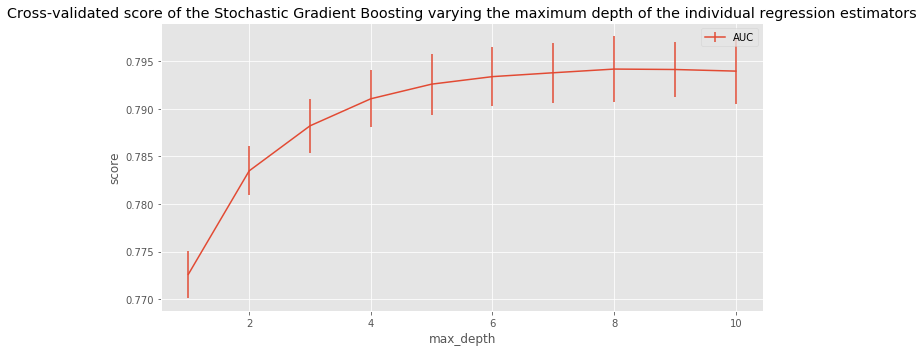

In [11]:
score_means = []
score_stds = []
max_depth_range = xrange(1, 11)

for max_depth in tqdm(max_depth_range):
    clf.set_params(max_depth=max_depth)
    this_scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=rs, n_jobs=-1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

best_max_depth = max_depth_range[np.argmax(score_means)]
clf.set_params(max_depth=best_max_depth)
plt.errorbar(max_depth_range, score_means, np.asarray(score_stds))
plt.legend(['AUC'])
plt.title('Cross-validated score of the Stochastic Gradient Boosting varying the maximum depth of the individual regression estimators')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.tight_layout()

100%|██████████| 10/10 [11:14<00:00, 61.24s/it]


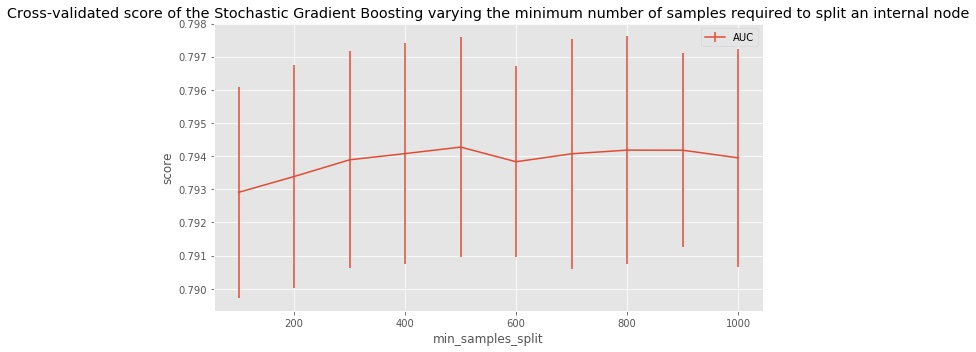

In [12]:
score_means = []
score_stds = []
min_samples_split_range = np.asarray(xrange(0, 1000, 100)) + 100

for min_samples_split in tqdm(min_samples_split_range):
    clf.set_params(min_samples_split=min_samples_split)
    this_scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=rs, n_jobs=-1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

best_min_samples_split = min_samples_split_range[np.argmax(score_means)]
clf.set_params(min_samples_split=best_min_samples_split)
plt.errorbar(min_samples_split_range, score_means, np.asarray(score_stds))
plt.legend(['AUC'])
plt.title('Cross-validated score of the Stochastic Gradient Boosting varying the minimum number of samples required to split an internal node')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.tight_layout()

100%|██████████| 10/10 [10:46<00:00, 63.53s/it]


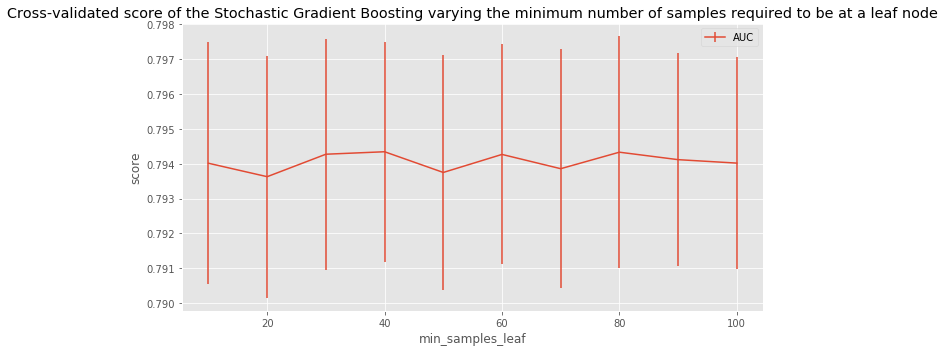

In [13]:
score_means = []
score_stds = []
min_samples_leaf_range = np.asarray(xrange(0, 100, 10)) + 10

for min_samples_leaf in tqdm(min_samples_leaf_range):
    clf.set_params(min_samples_leaf=min_samples_leaf)
    this_scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=rs, n_jobs=-1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

best_min_samples_leaf = min_samples_leaf_range[np.argmax(score_means)]
clf.set_params(min_samples_leaf=best_min_samples_leaf)
plt.errorbar(min_samples_leaf_range, score_means, np.asarray(score_stds))
plt.legend(['AUC'])
plt.title('Cross-validated score of the Stochastic Gradient Boosting varying the minimum number of samples required to be at a leaf node')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.tight_layout()

100%|██████████| 50/50 [28:01<00:00, 69.39s/it]


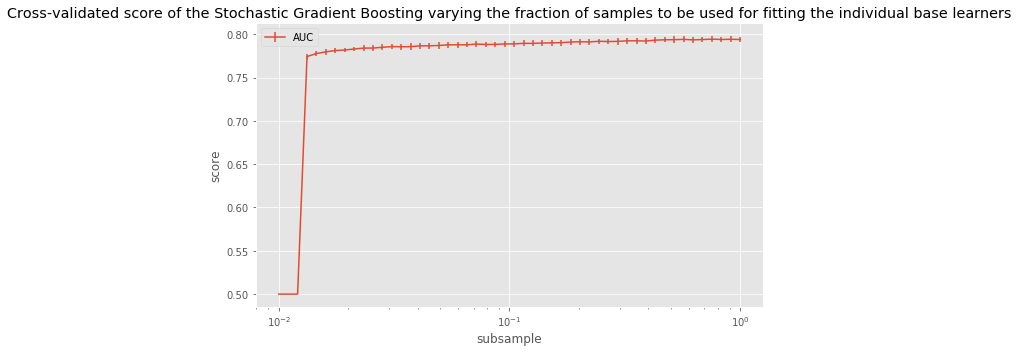

In [14]:
score_means = []
score_stds = []
subsample_range = np.logspace(-2, 0)

for subsample in tqdm(subsample_range):
    clf.set_params(subsample=subsample)
    this_scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=rs, n_jobs=-1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

best_subsample = subsample_range[np.argmax(score_means)]
clf.set_params(subsample=best_subsample)
plt.errorbar(subsample_range, score_means, np.asarray(score_stds))
plt.legend(['AUC'])
plt.title('Cross-validated score of the Stochastic Gradient Boosting varying the fraction of samples to be used for fitting the individual base learners')
plt.xlabel('subsample')
plt.xscale('log')
plt.ylabel('score')
plt.tight_layout()

100%|██████████| 59/59 [1:03:54<00:00, 109.85s/it]


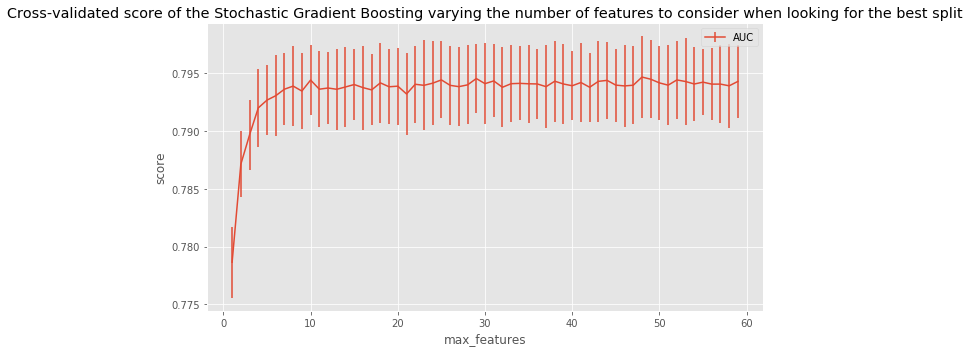

In [15]:
score_means = []
score_stds = []
max_features_range = np.asarray(xrange(X.shape[1])) + 1

for max_features in tqdm(max_features_range):
    clf.set_params(max_features=max_features)
    this_scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=rs, n_jobs=-1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

best_max_features = max_features_range[np.argmax(score_means)]
clf.set_params(max_features=best_max_features)
plt.errorbar(max_features_range, score_means, np.asarray(score_stds))
plt.legend(['AUC'])
plt.title('Cross-validated score of the Stochastic Gradient Boosting varying the number of features to consider when looking for the best split')
plt.xlabel('max_features')
plt.ylabel('score')
plt.tight_layout()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=rs.test_size, random_state=rs.random_state)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800000, 59), (1800000,), (200000, 59), (200000,))

In [17]:
clf.set_params(verbose=1)
clf.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3428           0.0431          125.10m
         2           1.3069           0.0356          119.70m
         3           1.2767           0.0298          117.29m
         4           1.2514           0.0252          113.83m
         5           1.2298           0.0213          111.20m
         6           1.2111           0.0184          108.85m
         7           1.1950           0.0157          108.19m
         8           1.1816           0.0135          106.00m
         9           1.1692           0.0119          105.36m
        10           1.1589           0.0104          104.50m
        20           1.1014           0.0032           93.65m
        30           1.0789           0.0017           79.17m
        40           1.0652           0.0009           66.35m
        50           1.0562           0.0005           53.66m
        60           1.0489           0.0007           41.65m
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=48, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=40,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=617533483,
              subsample=0.754312006335, verbose=1, warm_start=False)

In [18]:
y_proba = clf.predict_proba(X_test)
y_proba.shape

(200000, 2)

In [19]:
clf.score(X_test, y_test)

0.71955499999999994

In [20]:
clf.loss_(y_test, y_proba[:, 1])

1.3187670509617868

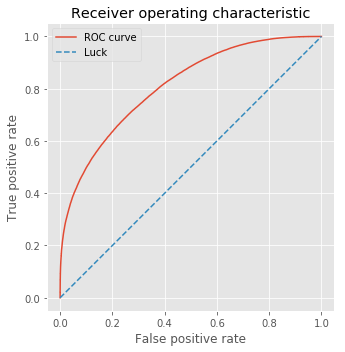

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
plt.plot(fpr, tpr)
plt.plot((0, 1), (0, 1), linestyle='--')
plt.axis('scaled')
plt.legend(('ROC curve', 'Luck'))
plt.title('Receiver operating characteristic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()

In [22]:
roc_auc_score(y_test, y_proba[:, 1])

0.81015752123265838

In [23]:
df_test = pd.read_csv('./testData_tabular.csv', sep=',', index_col=0)
df_test.columns = df_test.columns.str.replace('.', '_')
df_test.head().T

gamestate_id,6845857.0,9279433.0,6642076.0,9169516.0,8991397.0
decision,NaN,NaN,NaN,NaN,NaN
turn,12.0,6.0,14.0,7.0,9.0
opponent_armor,0.0,0.0,0.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hero_card_id,798.0,326.0,390.0,798.0,326.0
opponent_hp,29.0,12.0,12.0,30.0,30.0
opponent_special_skill_used,1.0,0.0,0.0,0.0,1.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,5.0,10.0,6.0,8.0
opponent_crystals_current,8.0,5.0,0.0,6.0,2.0


In [24]:
X_out_hero_card_id = enc.transform(df_test[['opponent_hero_card_id', 'player_hero_card_id']])
X_out = np.asarray(df_test.drop(['decision', 'opponent_hero_card_id', 'player_hero_card_id'], axis='columns'))
X_out = np.concatenate((X_out, X_out_hero_card_id), axis=1)
X_out.shape

(750000, 59)

In [25]:
y_out_proba = clf.predict_proba(X_out)
y_out_proba.shape

(750000, 2)

In [26]:
np.savetxt('testData_submission.csv', y_out_proba[:, 1:], delimiter=',')